### How to Create a Predictive Model for Heart Disease Prediction

**Introduction**

Predictive modeling for heart disease can significantly aid in early detection and treatment. This guide aims to provide a step-by-step approach to creating a predictive model, covering data exploration, feature engineering, and machine learning model building. It is tailored for junior data scientists looking to enhance their skills.

### 1. Introduction

Heart disease is one of the leading causes of death worldwide. By leveraging machine learning techniques, we can create predictive models to identify individuals at risk and facilitate early intervention. This guide walks you through the entire process of building a predictive model using a dataset of patient information and risk factors for heart disease.

### 2. Loading and Understanding the Data

The first step in any data science project is to load the dataset and understand its structure. Here, we use a dataset containing various attributes related to heart disease risk factors.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'heart_disease_dataset.csv'
heart_disease_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
heart_disease_data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


### 3. Exploratory Data Analysis (EDA)

EDA is crucial to understand the data and uncover patterns that can inform model building.

#### Data Cleaning
Before diving into analysis, it's crucial to clean the data. This involves handling missing values, correcting data types, and removing duplicates.

In [3]:
# Check for missing values
heart_disease_data.isnull().sum()

# Drop duplicates
heart_disease_data = heart_disease_data.drop_duplicates()

#### Statistical Summary
Generate a statistical summary to understand the distribution and central tendencies of the data.

In [4]:
# Statistical summary
heart_disease_data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


#### Data Visualization
Visualize the data to uncover patterns and relationships between variables.

In [10]:
heart_disease_data.select_dtypes(exclude=['object'])

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
0,75,228,119,66,1,8,119,1
1,48,204,165,62,5,9,70,0
2,53,234,91,67,3,5,196,1
3,69,192,90,72,4,7,107,0
4,62,172,163,93,6,2,183,0
...,...,...,...,...,...,...,...,...
995,56,269,111,86,5,10,120,1
996,78,334,145,76,6,10,196,1
997,79,151,179,81,4,8,189,0
998,60,326,151,68,8,5,174,1


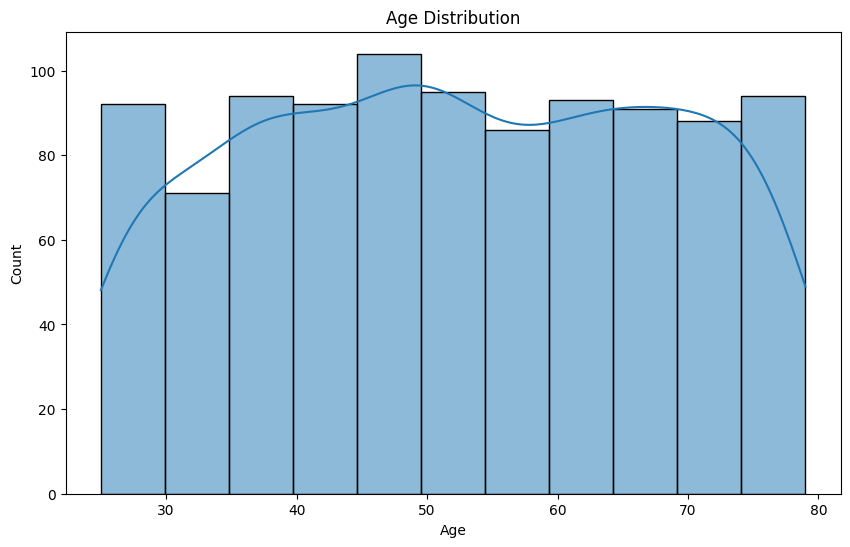

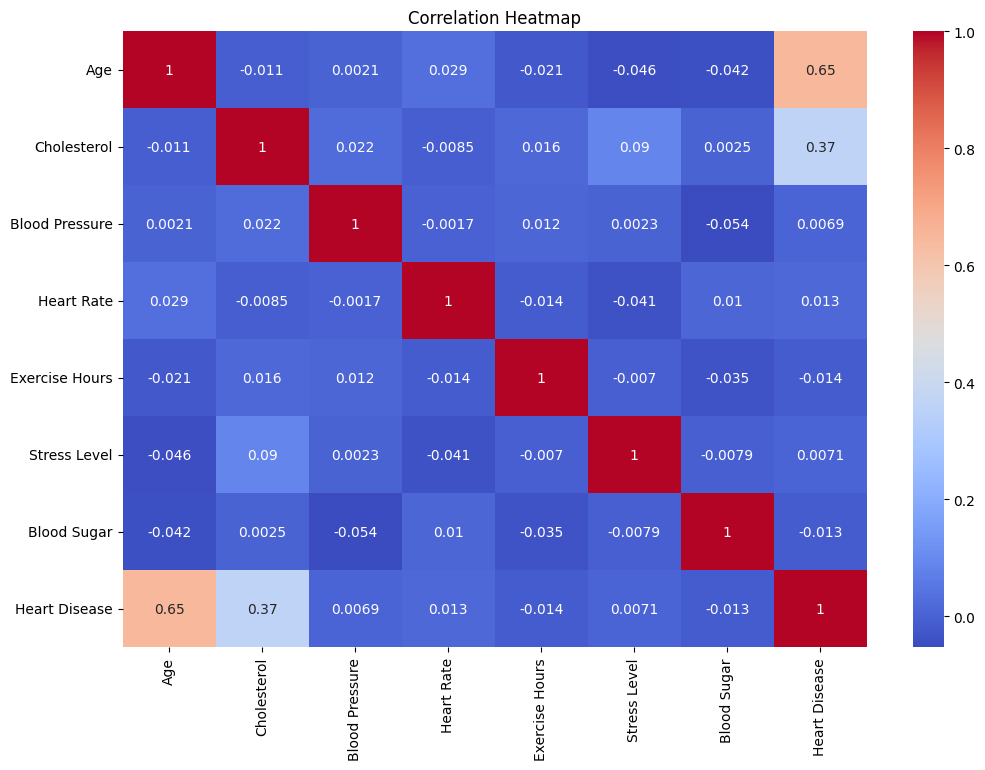

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(heart_disease_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = heart_disease_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



### 4. Data Preprocessing

#### Handling Missing Values
Identify and handle missing values appropriately. Techniques include imputation, deletion, or using algorithms that support missing values.

In [18]:
# Impute missing values if necessary
heart_disease_data.fillna(heart_disease_data.mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

#### Encoding Categorical Variables
Convert categorical variables into numerical values.

# One-hot encoding for categorical variables
heart_disease_data = pd.get_dummies(heart_disease_data, drop_first=True)

#### Feature Scaling
Normalize or standardize the data to ensure all features contribute equally to the model.

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features = heart_disease_data.drop('Heart Disease', axis=1)
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Heart Disease'] = heart_disease_data['Heart Disease']

### 5. Building the Predictive Model

#### Splitting the Data
Divide the dataset into training and testing sets to evaluate model performance.

from sklearn.model_selection import train_test_split

# Split the data
X = scaled_data.drop('Heart Disease', axis=1)
y = scaled_data['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Selection
Choose appropriate machine learning algorithms.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

#### Model Training
Train the selected model(s) on the training dataset.

# Train Logistic Regression model
log_reg.fit(X_train, y_train)

# Train Random Forest model
rf_clf.fit(X_train, y_train)

# Train SVM model
svm_clf.fit(X_train, y_train)

### 6. Evaluating the Model

#### Performance Metrics
Evaluate the model using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_svm_clf = svm_clf.predict(X_test)

# Evaluation
def evaluate_model(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

print("Logistic Regression Performance:")
evaluate_model(y_test, y_pred_log_reg)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf_clf)

print("SVM Performance:")
evaluate_model(y_test, y_pred_svm_clf)

#### Model Validation
Use techniques like cross-validation to validate the model and prevent overfitting.

from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

### 7. Conclusion

Creating a predictive model for heart disease involves several steps, from data cleaning and preprocessing to model selection and evaluation. By following this guide, junior data scientists can build a robust model to aid in the early detection of heart disease.

---

This guide provides a comprehensive overview of building a heart disease predictive model. For further improvement, consider exploring feature engineering techniques and experimenting with different algorithms and hyperparameters.